In [9]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torchvision import datasets, transforms


In [43]:
transform = transforms.Compose([
    transforms.ToTensor(),                
    transforms.Normalize((0.5,), (0.5,))  
])

# Загрузка данных MNIST
training_data = datasets.MNIST(root='data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False, download=True, transform=transform)
train_dataloader = DataLoader(training_data, batch_size=64)
train_dataloader = DataLoader(test_data, batch_size=64)

In [48]:
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        
        self.rnn_layer = nn.RNN(input_size=28, hidden_size=30, num_layers=2, batch_first=True)
        self.output_layer =nn.Linear(30, 10)

    
    def forward(self, X):
        X = X.squeeze(1) 
        X, _ = self.rnn_layer(X)
        X = self.output_layer(X[:, -1, :])
        return X
    

    


In [49]:
model = NeuralNet()


In [46]:
learning_rate = 1e-3
batch_size = 64
epochs = 10
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    total_loss = 0.0  
    
    for batch, (X, y) in enumerate(dataloader):
        
        pred = model(X)
        
        
        loss = loss_fn(pred, y)
        total_loss += loss.detach().item()  

        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        
        if batch % 100 == 0:
            current = batch * len(X)
            print(f'Current loss is {loss.item():.4f}, {current} / {size}')

    
    average_loss = total_loss / len(dataloader)
    return average_loss

In [50]:
for epoch in range(epochs):
    print(f'Epoch {epoch} / {epochs + 1}')
    train_loss = train_loop(train_dataloader, model, loss_fn, optimizer)
    print(f"Epoch {epoch + 1} finished with average training loss: {train_loss:.4f}")
    print("-" * 30)

Epoch 0 / 11
Current loss is 2.2727, 0 / 10000
Current loss is 2.3165, 6400 / 10000
Epoch 1 finished with average training loss: 2.3171
------------------------------
Epoch 1 / 11
Current loss is 2.2727, 0 / 10000
Current loss is 2.3165, 6400 / 10000
Epoch 2 finished with average training loss: 2.3171
------------------------------
Epoch 2 / 11
Current loss is 2.2727, 0 / 10000
Current loss is 2.3165, 6400 / 10000
Epoch 3 finished with average training loss: 2.3171
------------------------------
Epoch 3 / 11
Current loss is 2.2727, 0 / 10000
Current loss is 2.3165, 6400 / 10000
Epoch 4 finished with average training loss: 2.3171
------------------------------
Epoch 4 / 11
Current loss is 2.2727, 0 / 10000
Current loss is 2.3165, 6400 / 10000
Epoch 5 finished with average training loss: 2.3171
------------------------------
Epoch 5 / 11
Current loss is 2.2727, 0 / 10000
Current loss is 2.3165, 6400 / 10000
Epoch 6 finished with average training loss: 2.3171
-----------------------------

In [53]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Преобразования для данных
transform = transforms.Compose([
    transforms.ToTensor(),                # Преобразование в тензор
    transforms.Normalize((0.5,), (0.5,))  # Нормализация данных в диапазон [-1, 1]
])

# Загрузка данных MNIST
training_data = datasets.MNIST(root='data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False, download=True, transform=transform)

# Определение модели
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.rnn_layer = nn.RNN(input_size=28, hidden_size=64, num_layers=2, batch_first=True)
        self.output_layer = nn.Linear(64, 10)

    def forward(self, X):
        X = X.squeeze(1)  # Убираем лишнюю размерность
        X, _ = self.rnn_layer(X)
        X = self.output_layer(X[:, -1, :])
        return X

# Инициализация модели, даталоадеров, функции потерь и оптимизатора
model = NeuralNet()
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64)

learning_rate = 1e-3
epochs = 10
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Функция для обучения
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    total_loss = 0.0
    
    for batch, (X, y) in enumerate(dataloader):
        # Предсказание и вычисление потерь
        pred = model(X)
        loss = loss_fn(pred, y)
        total_loss += loss.detach().item()

        # Шаг градиентного спуска
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Печать каждые 100 шагов
        if batch % 100 == 0:
            current = batch * len(X)
            print(f"Current loss is {loss.item():.4f}, {current} / {size}")

    average_loss = total_loss / len(dataloader)
    return average_loss

# Цикл по эпохам
for epoch in range(epochs):
    print(f"Epoch {epoch + 1} / {epochs}")
    train_loss = train_loop(train_dataloader, model, loss_fn, optimizer)
    print(f"Epoch {epoch + 1} finished with average training loss: {train_loss:.4f}")
    print("-" * 30)

Epoch 1 / 10
Current loss is 2.3186, 0 / 60000
Current loss is 1.0752, 6400 / 60000
Current loss is 0.9785, 12800 / 60000
Current loss is 0.7817, 19200 / 60000
Current loss is 0.6653, 25600 / 60000
Current loss is 0.5857, 32000 / 60000
Current loss is 0.3266, 38400 / 60000
Current loss is 0.5631, 44800 / 60000
Current loss is 0.3852, 51200 / 60000
Current loss is 0.2867, 57600 / 60000
Epoch 1 finished with average training loss: 0.7203
------------------------------
Epoch 2 / 10
Current loss is 0.2583, 0 / 60000
Current loss is 0.2979, 6400 / 60000
Current loss is 0.3834, 12800 / 60000
Current loss is 0.2032, 19200 / 60000
Current loss is 0.3610, 25600 / 60000
Current loss is 0.2329, 32000 / 60000
Current loss is 0.4524, 38400 / 60000
Current loss is 0.4718, 44800 / 60000
Current loss is 0.2208, 51200 / 60000
Current loss is 0.1346, 57600 / 60000
Epoch 2 finished with average training loss: 0.3052
------------------------------
Epoch 3 / 10
Current loss is 0.2930, 0 / 60000
Current los

In [54]:
def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()  # Переключаем модель в режим оценки
    test_loss, correct = 0, 0

    with torch.no_grad():  # Отключаем автоматическое вычисление градиентов
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()  # Суммируем потери для каждого батча
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()  # Считаем количество правильных предсказаний

    test_loss /= num_batches  
    accuracy = correct / size  
    print(f"Test Error: \n Accuracy: {(100 * accuracy):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [55]:
test_loss = test_loop(test_dataloader, model, loss_fn)

Test Error: 
 Accuracy: 96.5%, Avg loss: 0.118615 



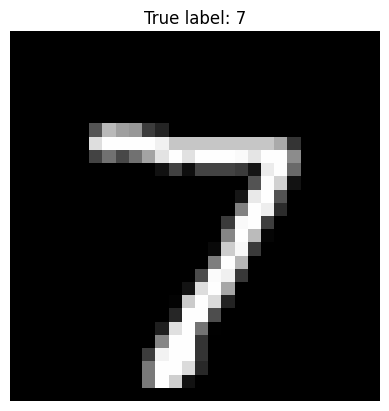

Predicted label: 7


In [56]:
import matplotlib.pyplot as plt
import torch

# Функция для отображения изображения
def show_image(image, title="Image"):
    image = image.squeeze(0)  # Убираем лишний размер, если он есть (например, из-за batch dimension)
    plt.imshow(image, cmap="gray")
    plt.title(title)
    plt.axis("off")
    plt.show()

# Получаем одну картинку из тестового датасета
example_image, example_label = test_data[0]

# Показать изображение с правильной меткой
show_image(example_image, title=f"True label: {example_label}")

# Подготовка изображения для передачи в модель
# Добавляем batch dimension (чтобы получить форму [1, 1, 28, 28], если это MNIST)
input_image = example_image.unsqueeze(0)  # Изменяем размер с [1, 28, 28] на [1, 1, 28, 28]

# Переключаем модель в режим оценки
model.eval()

# Провести изображение через модель
with torch.no_grad():  # Выключаем градиенты для режима оценки
    output = model(input_image)
    predicted_class = output.argmax(dim=1).item()  # Получаем индекс класса с максимальной вероятностью

# Показать результат предсказания
print(f"Predicted label: {predicted_class}")